In [1]:
# from transformers import BertTokenizer, AdamW, get_linear_schedule_with_warmup, BertForSequenceClassification
# import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
import pathlib
from matplotlib import rc
%matplotlib inline
%config InlineBackend.figure_format='retina'
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))
rcParams['figure.figsize'] = 8, 5
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
# torch.manual_seed(RANDOM_SEED)
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [2]:
ROOT_DIR = pathlib.Path().resolve().parents[1]
print(f"Root directory: {ROOT_DIR}")
DATA_DIR = ROOT_DIR/'qg'/'transformers_models'/'results_2022-06-20_1655742201.648833'

Root directory: C:\Users\DeboraOrsolich\Development\question_generation_models\deep_qg


In [3]:
DATA_DIR

WindowsPath('C:/Users/DeboraOrsolich/Development/question_generation_models/deep_qg/qg/transformers_models/results_2022-06-20_1655742201.648833')

In [4]:
import json

with open(DATA_DIR/"train_results_distilbert_base_cased_2022-06-20_1655742201.648833.json") as f:
    train_results = json.load(f)

with open(DATA_DIR/"test_results_distilbert_base_cased_2022-06-20_1655753602.7229006.json") as f:
    val_results = json.load(f)

In [5]:
print(train_results.keys())
print()
print(val_results.keys())

dict_keys(['device', 'len_dataset', 'example_context', 'example_question', 'seed', 'test', 'dataset', 'dataset_split', 'model', 'model_name', 'learning_rate', 'adam_epsilon', 'batch_size', 'n_epochs', 'lr_decay', 'dropout', 'max_length_source', 'max_length_target', 'training_epoch_loss_values', 'training_batch_loss_values', 'training_epoch_accuracy_values', 'epoch_training_time', 'pred_y', 'true_y', 'task', 'total_training_time'])

dict_keys(['device', 'len_dataset', 'example_context', 'example_question', 'seed', 'test', 'results_folder', 'dataset', 'dataset_split', 'model', 'model_name', 'batch_size', 'n_epochs', 'max_length_source', 'max_length_target', 'validation_batch_loss_values', 'validation_epoch_loss_values', 'validation_epoch_accuracy_values', 'pred_y', 'true_y'])


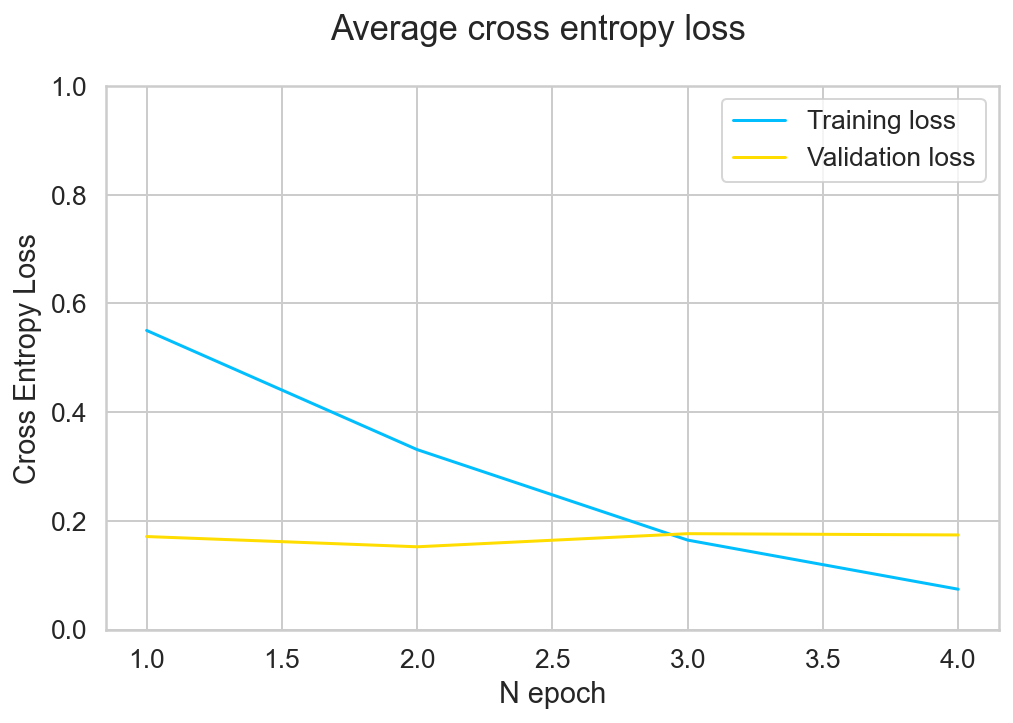

In [6]:
train_epoch_loss = train_results["training_epoch_loss_values"]
val_epoch_loss = val_results["validation_epoch_loss_values"]
# batch_loss_values = 
epoch = [i for i in range(1, 5)]
# sns.lineplot(x=epoch, y=train_epoch_loss)
plt.plot(epoch, train_epoch_loss, label="Training loss")
plt.plot(epoch, val_epoch_loss, label="Validation loss")
plt.suptitle("Average cross entropy loss")
plt.xlabel('N epoch')
plt.ylabel('Cross Entropy Loss')
plt.ylim([0, 1])
plt.legend()

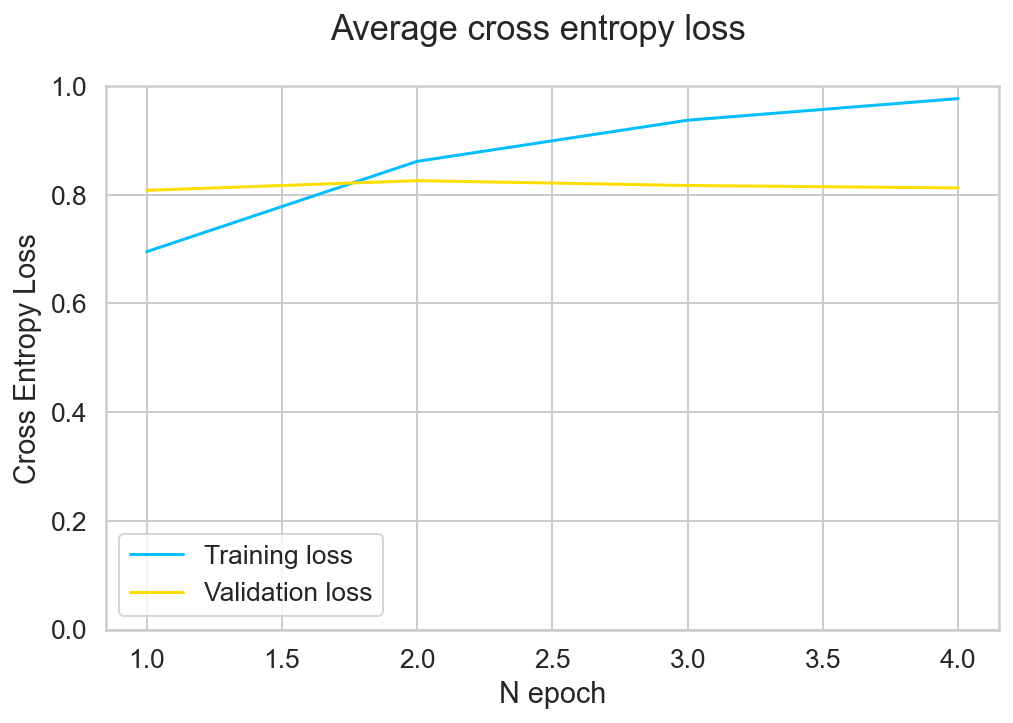

In [7]:
training_epoch_accuracy = [dic["accuracy"] for dic in train_results["training_epoch_accuracy_values"]]
validation_epoch_accuracy = [dic["accuracy"] for dic in val_results["validation_epoch_accuracy_values"]]
# batch_loss_values = 
epoch = [i for i in range(1, 5)]
# sns.lineplot(x=epoch, y=train_epoch_loss)
plt.plot(epoch, training_epoch_accuracy, label="Training loss")
plt.plot(epoch, validation_epoch_accuracy, label="Validation loss")
plt.suptitle("Average cross entropy loss")
plt.xlabel('N epoch')
plt.ylabel('Cross Entropy Loss')
plt.ylim([0, 1])
plt.legend()

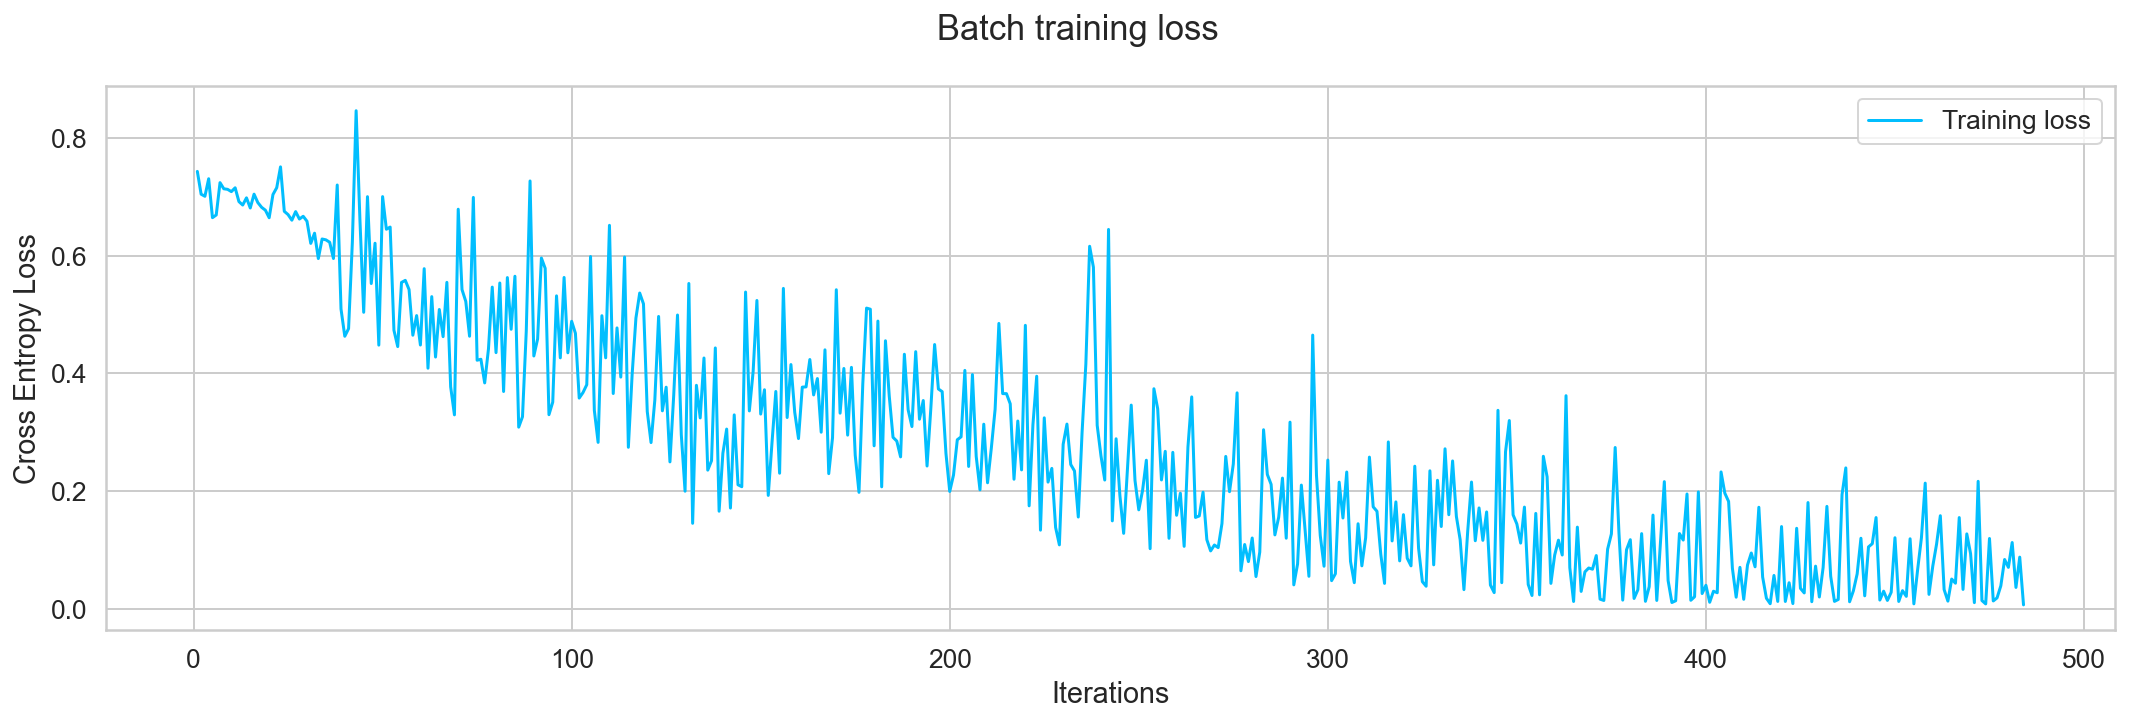

In [8]:
rcParams['figure.figsize'] = 18, 5
train_batch_loss = train_results["training_batch_loss_values"]
batch = [i for i in range(1, len(train_batch_loss)+1)]
sns.lineplot(x=batch, y=train_batch_loss, label="Training loss")
plt.suptitle("Batch training loss")
# plt.suptitle("Cross entropy loss")
plt.xlabel('Iterations')
plt.ylabel('Cross Entropy Loss')
plt.legend()

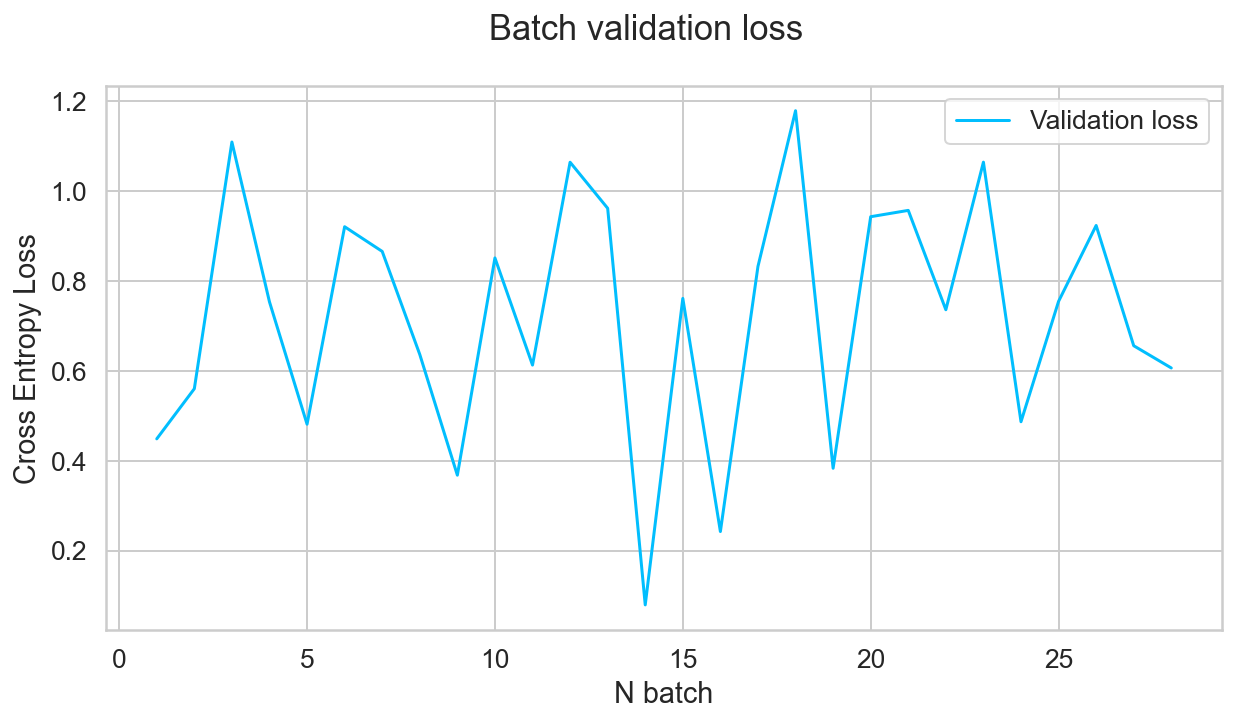

In [9]:
rcParams['figure.figsize'] = 10, 5
val_batch_loss = val_results["validation_batch_loss_values"]
batch = [i for i in range(1, len(val_batch_loss)+1)]
sns.lineplot(x=batch, y=val_batch_loss, label="Validation loss")
plt.suptitle("Batch validation loss")
plt.xlabel('N batch')
plt.ylabel('Cross Entropy Loss')
plt.legend()

In [10]:
train_ys = {
    "true_y": train_results["true_y"],
    "pred_y": train_results["pred_y"],
}
val_ys = {
    "true_y": val_results["true_y"],
    "pred_y": val_results["pred_y"],
}
t_ys_df = pd.DataFrame.from_dict(train_ys)
v_ys_df = pd.DataFrame.from_dict(val_ys)

c:\Users\DeboraOrsolich\miniconda3\envs\ques_gen_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\DeboraOrsolich\miniconda3\envs\ques_gen_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DeboraOrsolich\AppData\Local\Temp\ipykernel_22412\2045155307.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


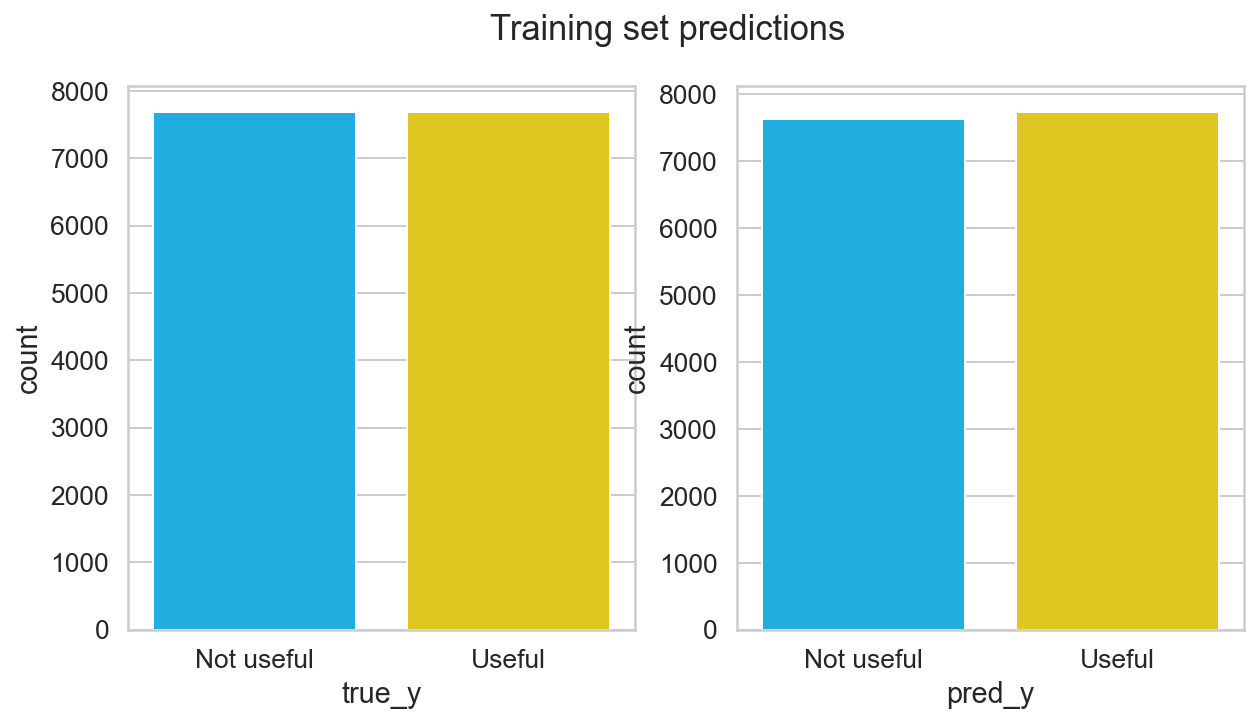

In [11]:
fig, ax =plt.subplots(1,2)
fig.suptitle("Training set predictions")
class_names = ['Not useful', 'Useful']
sns.countplot(t_ys_df['true_y'], ax=ax[0])
sns.countplot(t_ys_df['pred_y'], ax=ax[1])
ax[0].set_xticklabels(class_names)
ax[1].set_xticklabels(class_names)
fig.show()

c:\Users\DeboraOrsolich\miniconda3\envs\ques_gen_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\DeboraOrsolich\miniconda3\envs\ques_gen_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\DeboraOrsolich\AppData\Local\Temp\ipykernel_22412\599222541.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


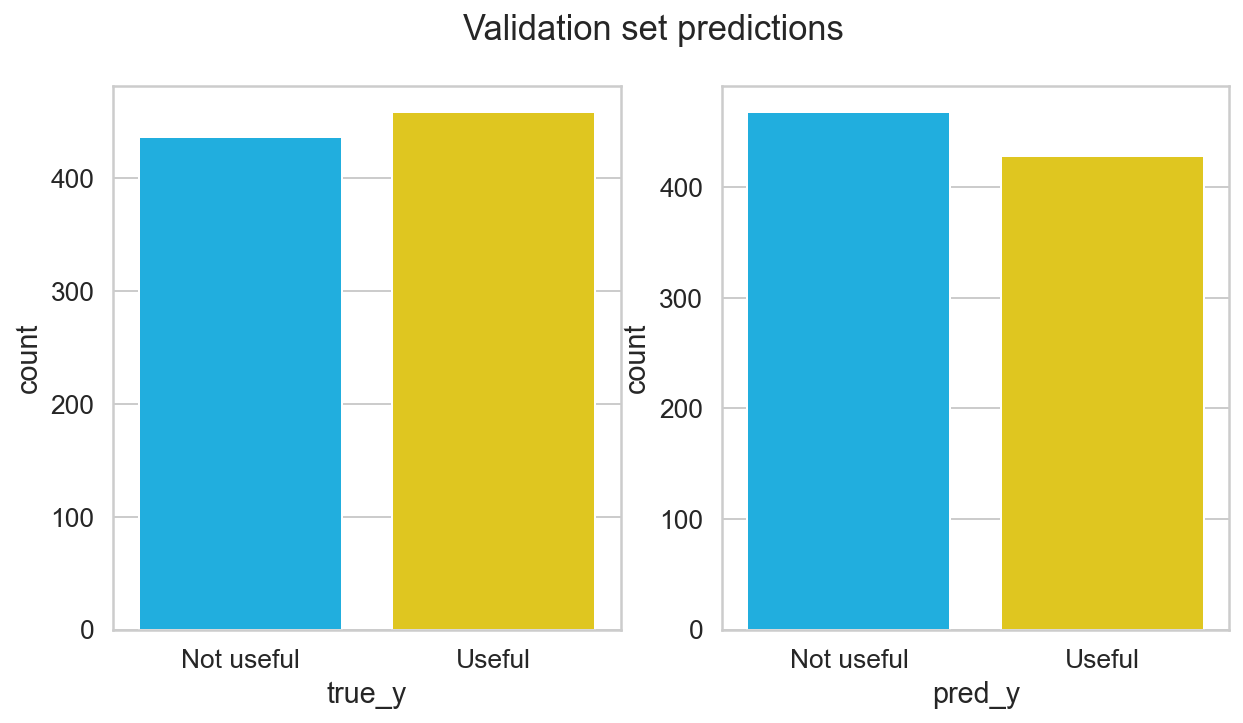

In [12]:
fig, ax =plt.subplots(1,2)
fig.suptitle("Validation set predictions")
class_names = ['Not useful', 'Useful']
sns.countplot(v_ys_df['true_y'], ax=ax[0])
sns.countplot(v_ys_df['pred_y'], ax=ax[1])
ax[0].set_xticklabels(class_names)
ax[1].set_xticklabels(class_names)
fig.show()

In [13]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score
train_cf = confusion_matrix(train_results["true_y"], train_results["pred_y"])
train_accuracy = accuracy_score(train_results["true_y"], train_results["pred_y"])
train_recall = recall_score(train_results["true_y"], train_results["pred_y"], average=None)
train_precision = precision_score(train_results["true_y"], train_results["pred_y"], average=None)


val_cf = confusion_matrix(val_results["true_y"], val_results["pred_y"])
val_accuracy = accuracy_score(val_results["true_y"], val_results["pred_y"])
val_recall = recall_score(val_results["true_y"], val_results["pred_y"], average=None)
val_precision = precision_score(val_results["true_y"], val_results["pred_y"], average=None)

print("train_cf:    \n{}".format(train_cf))
print("train_accuracy:     {}".format(train_accuracy))
print("train_recall:       {}".format(train_recall))
print("train_precision:    {}".format(train_precision))

print()

print("val_cf:     \n{}".format(val_cf))
print("val_accuracy:       {}".format(val_accuracy))
print("val_recall:         {}".format(val_recall))
print("val_precision:      {}".format(val_precision))

train_cf:    
[[6644 1044]
 [ 992 6696]]
train_accuracy:     0.867585848074922
train_recall:       [0.86420395 0.87096774]
train_precision:    [0.87008905 0.86511628]

val_cf:     
[[370  67]
 [ 98 361]]
val_accuracy:       0.8158482142857143
val_recall:         [0.84668192 0.78649237]
val_precision:      [0.79059829 0.84345794]


In [14]:
from sklearn.metrics import classification_report
print("Training set:")
print(classification_report(train_results["true_y"], train_results["pred_y"], target_names=["Not useful", "useful"]))
print()
print("Validation set:")
print(classification_report(val_results["true_y"], val_results["pred_y"], target_names=["Not useful", "useful"]))


Training set:
              precision    recall  f1-score   support

  Not useful       0.87      0.86      0.87      7688
      useful       0.87      0.87      0.87      7688

    accuracy                           0.87     15376
   macro avg       0.87      0.87      0.87     15376
weighted avg       0.87      0.87      0.87     15376


Validation set:
              precision    recall  f1-score   support

  Not useful       0.79      0.85      0.82       437
      useful       0.84      0.79      0.81       459

    accuracy                           0.82       896
   macro avg       0.82      0.82      0.82       896
weighted avg       0.82      0.82      0.82       896



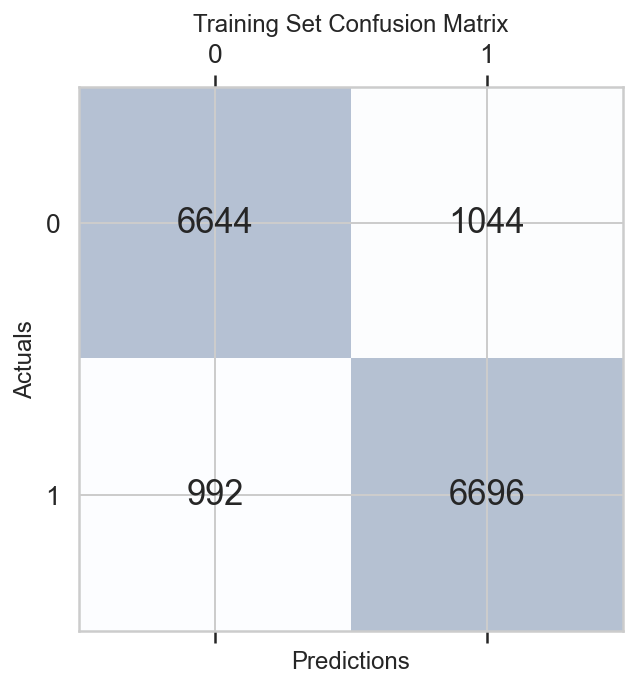

In [15]:

fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(train_cf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(train_cf.shape[0]):
    for j in range(train_cf.shape[1]):
        ax.text(x=j, y=i,s=train_cf[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Training Set Confusion Matrix', fontsize=12)
plt.show()

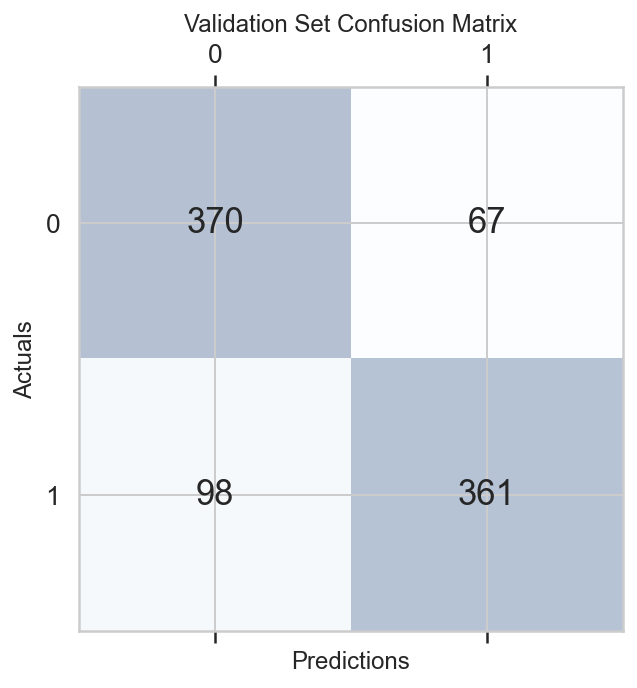

In [16]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(val_cf, cmap=plt.cm.Blues, alpha=0.3)
for i in range(val_cf.shape[0]):
    for j in range(val_cf.shape[1]):
        ax.text(x=j, y=i,s=val_cf[i, j], va='center', ha='center', size='large')
 
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Validation Set Confusion Matrix', fontsize=12)
plt.show()